### <span style="color:red"> Earth-Moon CRTBP (Circular Restricted Three-Body Problem)</span>

In [1]:
# Spacecraft Guidance and Navigation (2023/2024)
# Author: Deniz Benil Gunay

The 3D Restricted Three-Body Problem (3D CRTBP) is a problem in which two large masses rotate in a circular orbit and a third, massless or relatively low-mass object moves under the gravitational influence of these two masses.
In this example, it is considered that Earth and Moon are two large masses, and third object is satellite. Queqiao Communications Satellite, China's communications satellite for the Chang'e 4 mission to the far side of the Moon, is placed in an orbit close to the Earth-Moon Lagrange point L2.

In [11]:
# Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

In [12]:
# Plotting Features
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['lines.linewidth'] = 1.5

In [13]:
# µ is related to the mass ratio in the Earth and Moon system and thus the gravitational effect is calculated.
# Rosales, J., R. Jorba, and Marc Jorba-Cuscó. "Transfers from the Earth to L2 Halo Orbits in the Earth-Moon Bicircular Problem.", April 30, 2021.
mu = 0.012150581623433

We use the potential function in the Circular Restricted Three-Body Problem (CBTP) model for several important reasons.
Potential energy determines the amount of energy an object has in a force field.
Under central forces such as gravitational forces, the potential energy function is a mathematical representation of the gravitational forces in a system and can be used to determine where and how a particle will move.
In particular, the derivatives of the potential function help us understand the motion of a particle.

1. Potential energy is a function of the gravitational forces, and potential energy changes as the distance between the two objects changes.

2. The derivatives of the potential energy equal the gravitational force. F=−∇U(r)

3. When the derivatives of the potential function (gravitational force) become zero, an equilibrium point (Lagrange-point) is obtained. These points represent the regions where the particle is being pulled by the two massive objects and **remains in balance**.

Potential Function
$$
U(x,y,z) = \frac{1}{2} (x^2 + y^2) + \frac{1-\mu}{r_1} + \frac{\mu}{r_2}
$$

where,
$$
r_1 = \sqrt{(x+\mu)^2 + y^2 + z^2}
$$
$$
r_2 = \sqrt{(x - (1-\mu))^2 + y^2 + z^2}
$$
x, y,z: These coordinates represent the position of a third body (for example, a satellite) in space.  
r1: The distance of the third body to the larger body (for example, the Earth).  
r2: The distance of the third body to the second larger body (for example, the Moon).  
µ: The mass ratio of the second larger body (Moon) to the total mass (Earth and Moon).  

The derivation of the potantial function U(x, y, z) according to x to find gravitational force, and balance points where gravitational forces are zero.
$$
F(x) = x - \frac{(1-\mu)(x+\mu)}{|x+\mu|^3} - \frac{\mu(x+\mu-1)}{|x+\mu-1|^3}
$$


In [44]:
# Defining The Gradient of the Potential Function (U) with respect to (x)
def fx(x):
    return x - ((1 - mu) * (x + mu)) / abs(x + mu)**3 - mu * (x + mu - 1) / abs(x + mu - 1)**3

In [43]:
# Initial Points
xinterval = np.arange(-2, 2, 0.0001 * mu)  # Interval of x-axis
x0_L1 = 1
x0_L2 = 0
x0_L3 = -1

In [48]:
# The roots are the points where the function f(x) is zero, and these zero points represent the equilibrium points of the Earth-Moon Binary System.
# Therefore, we find the roots of the equations for the Lagrange points (L1, L2, L3).
xL1 = fsolve(fx, x0_L1)[0]  # L1 Point
xL2 = fsolve(fx, x0_L2)[0]  # L2 Point
xL3 = fsolve(fx, x0_L3)[0]  # L3 Point

In [46]:
# dU/dx is the array that keeps the all x in Partial Diffential Function (f(x)) of Potential Function U with respect to x.
dUdx = np.array([fx(x) for x in xinterval])
# The code in this line calculates the fx(x) function for each x value.
# np.array([fx(x) for x in interval]): This line applies the fx(x) function for each x value in the given interval x and stores the result as a NumPy array.
print(dUdx)

[-1.74864827 -1.74864675 -1.74864523 ...  1.74414684  1.74414838
  1.74414991]


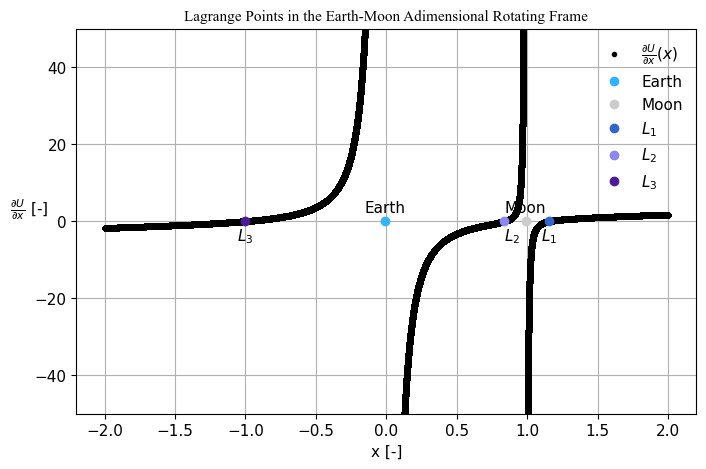

In [47]:
# Plotting
plt.figure(figsize=(8, 5))
plt.plot(xinterval, dUdx, '.', color='k', label=r'$\frac{\partial U}{\partial x}(x)$')

# Plot Earth and Moon
plt.plot(-mu, 0, 'o', linewidth=9, color=[0.2010, 0.7000, 1])
plt.text(-mu, 1.5, 'Earth', verticalalignment='bottom', horizontalalignment='center')
plt.plot(1 - mu, 0, 'o', linewidth=4.75, color=[0.8, 0.8, 0.8])
plt.text(1 - mu, 1.5, 'Moon', verticalalignment='bottom', horizontalalignment='center')

# Plot Lagrange points
plt.plot(xL1, 0, 'o', color=[0.2000, 0.4000, 0.8000], linewidth=3)
plt.text(xL1, -1.5, r'$L_1$', verticalalignment='top', horizontalalignment='center')

plt.plot(xL2, 0, 'o', color=[0.5500, 0.5300, 0.9500], linewidth=3)
plt.text(xL2, -1.5, r'$L_2$', verticalalignment='top', horizontalalignment='left')

plt.plot(xL3, 0, 'o', color=[0.3000, 0.1000, 0.6000], linewidth=3)
plt.text(xL3, -1.5, r'$L_3$', verticalalignment='top', horizontalalignment='center')

# Set plot limits and labels
plt.ylim([-50, 50])
plt.xlabel('x [-]')
plt.ylabel(r'$\frac{\partial U}{\partial x}$ [-]', rotation=0, fontsize=11)
plt.title('Lagrange Points in the Earth-Moon Adimensional Rotating Frame', fontsize=11, fontname='Times New Roman')
plt.grid(True)

# Add legend
plt.legend([r'$\frac{\partial U}{\partial x}(x)$', 'Earth', 'Moon', '$L_1$', '$L_2$', '$L_3$'], loc='best', frameon=False)

# Show plot
plt.show()

The **\( dUdx \)** array holds the results of the function **\( f(x) \)**, which is the derivative of the potential energy with respect to **\( x \)**.  These results are calculated for each value of (x) within the (x) interval. The black dots represent the graphical display of these derivative values of potential function according to its x values.


In our function, we are looking for points where the dUdx value is zero. This means that the gravitational forces acting on the object from the Earth and the Moon are balanced at these positions, and the object is not experiencing a net force.
The roots of the f(x) function correspond to the equilibrium points where the gravitational forces between the Earth and the Moon are balanced. At these points, the object experiences no net force and remains in a stable configuration.

<span style="color:red">L1</span> :Located on the line between the Earth and the Moon and is ideal for observing interactions between the Sun, Earth and the Moon. Used for space exploration and **solar system observations**

<span style="color:red">L2</span> : Located opposite the Earth and the Moon and is suitable for **deep space observations**, **cosmic microwave background (CMB) studies** and **dark matter** studies.

<span style="color:red">L3</span>: Located directly opposite the line between the Earth and the Moon and is generally used for **theoretical research** and modeling, but is **not very common in practical applications.**